In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB

In [10]:
data = pd.read_csv('../00_source_data/preprocessed_data_yelp.csv', encoding='latin-1')

In [11]:
data.dropna(inplace=True)
data.head()

,label,text
0,2,contrari review zero complaint servic price ge...
1,1,last summer appoint get new tire wait super lo...
2,2,friendli staff starbuck fair get anywher els s...
3,1,food good unfortun servic hit miss main issu s...
4,2,even didnt car filen basement worth bu trip wa...


In [12]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2,random_state=42)

In [13]:
# CounterVectizor
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
# training classifier with NB
nb = MultinomialNB()
nb.fit(X_train_cv, y_train)

MultinomialNB()

In [15]:
# print prediction and metrics on training set
y_pred_tr = nb.predict(X_train_cv)
print('Training set')
print('Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Confusion Matrix: ')
print(confusion_matrix(y_train, y_pred_tr))
print('Classification Report: ')
print(classification_report(y_train, y_pred_tr))
print('=====================================')

# print prediction and metrics on test set
y_pred_te = nb.predict(X_test_cv)
print('Test set')
print('Accuracy: ')
print(accuracy_score(y_test, y_pred_te))
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred_te))
print('Classification Report: ')
print(classification_report(y_test, y_pred_te))

Training set
Accuracy:  0.9045363334320208
Confusion Matrix: 
[[13728  1478]
 [ 1424 13769]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.91      0.90      0.90     15206
           2       0.90      0.91      0.90     15193

    accuracy                           0.90     30399
   macro avg       0.90      0.90      0.90     30399
weighted avg       0.90      0.90      0.90     30399

Test set
Accuracy: 
0.8606578947368421
Confusion Matrix: 
[[3278  515]
 [ 544 3263]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.86      0.86      0.86      3793
           2       0.86      0.86      0.86      3807

    accuracy                           0.86      7600
   macro avg       0.86      0.86      0.86      7600
weighted avg       0.86      0.86      0.86      7600



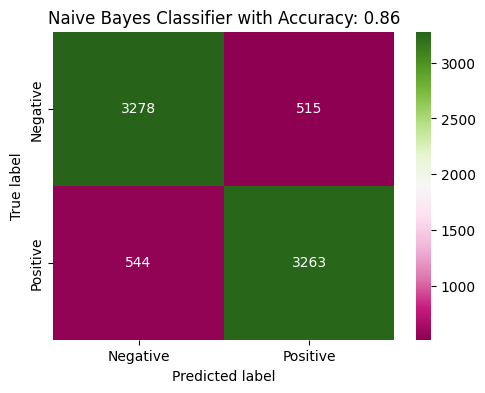

In [16]:
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred_te)
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap="PiYG")
plt.title('Naive Bayes Classifier with Accuracy: {0:.2f}'.format(accuracy_score(y_test, y_pred_te)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# save plot to file
plt.savefig('../30_results/NB_real_data.png')